![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Segmentation of Color Images

Based on:

Mery, D., & Pedreschi, F. (2005). [Segmentation of colour food images using a robust algorithm](http://dmery.sitios.ing.uc.cl/Prints/ISI-Journals/2005-JFoodEng-Segmentation.pdf). Journal of Food engineering, 66(3), 353-360.


# Input image

Original Image from Flickr:


Flor: https://flic.kr/p/cXvAWS


(c) Domingo Mery

In [ ]:
!wget https://www.dropbox.com/s/f36bjab65srn2et/flor.png

--2023-07-17 22:03:11--  https://www.dropbox.com/s/f36bjab65srn2et/flor.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/f36bjab65srn2et/flor.png [following]
--2023-07-17 22:03:12--  https://www.dropbox.com/s/raw/f36bjab65srn2et/flor.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0e9159b03ebef0bffcb1fae336.dl.dropboxusercontent.com/cd/0/inline/CACMlabvbX9v0MoU6X41NsXTACht3Fn6a_2YUhzDdeQ9AlxtB51d4MaxVdiDcj7EOG5STAfM1xHuqvlwN_sl5pWgog_ovYk9wngChcB_gE2CUG-ANBSjM7V7YWLEdc-7-6zJGwy3o0yj5AlHGlPkSIz8Pl_ydM_1pd-6QehvXDTppA/file# [following]
--2023-07-17 22:03:12--  https://uc0e9159b03ebef0bffcb1fae336.dl.dropboxusercontent.com/cd/0/inline/CACMlabvbX9v0MoU6X41NsXTACht3Fn6a_2YUhzDdeQ9AlxtB51d4MaxVdiDcj7EOG5STAfM1xHuqvlwN_sl5pWgog_o

In [ ]:
import cv2
def fillhole(input_image):
    '''
    input gray binary image  get the filled image by floodfill method
    Note: only holes surrounded in the connected regions will be filled.
    :param input_image:
    :return:
    from https://www.programcreek.com/python/example/89425/cv2.floodFill
    '''
    im_flood_fill = input_image.copy()
    h, w = input_image.shape[:2]
    mask = np.zeros((h + 2, w + 2), np.uint8)
    im_flood_fill = im_flood_fill.astype("uint8")
    cv2.floodFill(im_flood_fill, mask, (0, 0), 255)
    im_flood_fill_inv = cv2.bitwise_not(im_flood_fill)
    img_out = input_image | im_flood_fill_inv
    return img_out

In [ ]:
from skimage.transform import resize
from scipy.optimize import minimize
from skimage.filters import threshold_otsu
from skimage import morphology

from skimage.morphology import binary_closing, remove_small_objects, remove_small_holes
import numpy as np
import warnings

_disk = np.ones((13, 13), dtype=np.uint8)
_disk[[0, 0, 0, 0, 1, 1, -2, -2, -1, -1, -1, -1],
      [0, 1, -2, -1, 0, -1, 0, -1, 0, 1, -2, -1]] = 0


def morphoreg(image, threshold=None):
    if threshold is None:
        R = image >= 0
    else:
        R = image > threshold
    region = fillhole(R)
    #with warnings.catch_warnings():
    #    warnings.filterwarnings("ignore")
    #    clean = remove_small_objects(R, R.size // 100.0, connectivity=2)
    #    closed = binary_closing(clean, _disk)
    #    region = remove_small_holes(
    #        closed, R.size // 100.0, connectivity=2).astype(int)
    #    edge = bw_perim(region)
    return region


_k = np.ones(3)

def rgb2hcm(image):

    if image.ndim < 3:
        I = image
    else:
        img_resize = resize(image, (64, 64), order=3,
                            mode='reflect', anti_aliasing=False)
        k = minimize(monochrome_std, [1., 1.], args=(img_resize,))['x']
        _k[:2] = k
        I = image @ _k
    J = I - I.min()
    J = J / J.max()
    n = J.shape[0] // 4
    m = J.shape[1] // 4

    if (J[:n, :m].mean() > .4):
        J = 1 - J
    return J


def monochrome_std(k, image):
    _k[:2] = k
    I = image @ _k
    return - I.std(ddof=1) / (I.max() - I.min())

def segbalu(image, p=-.05):
    hcm = rgb2hcm(image.astype('double'))
    threshold = threshold_otsu(hcm)
    region = morphoreg(hcm, threshold + p)
    return region, hcm

Despliegue de imagenes: Original, Gris de alto contrast (HCI) y Segmentacion


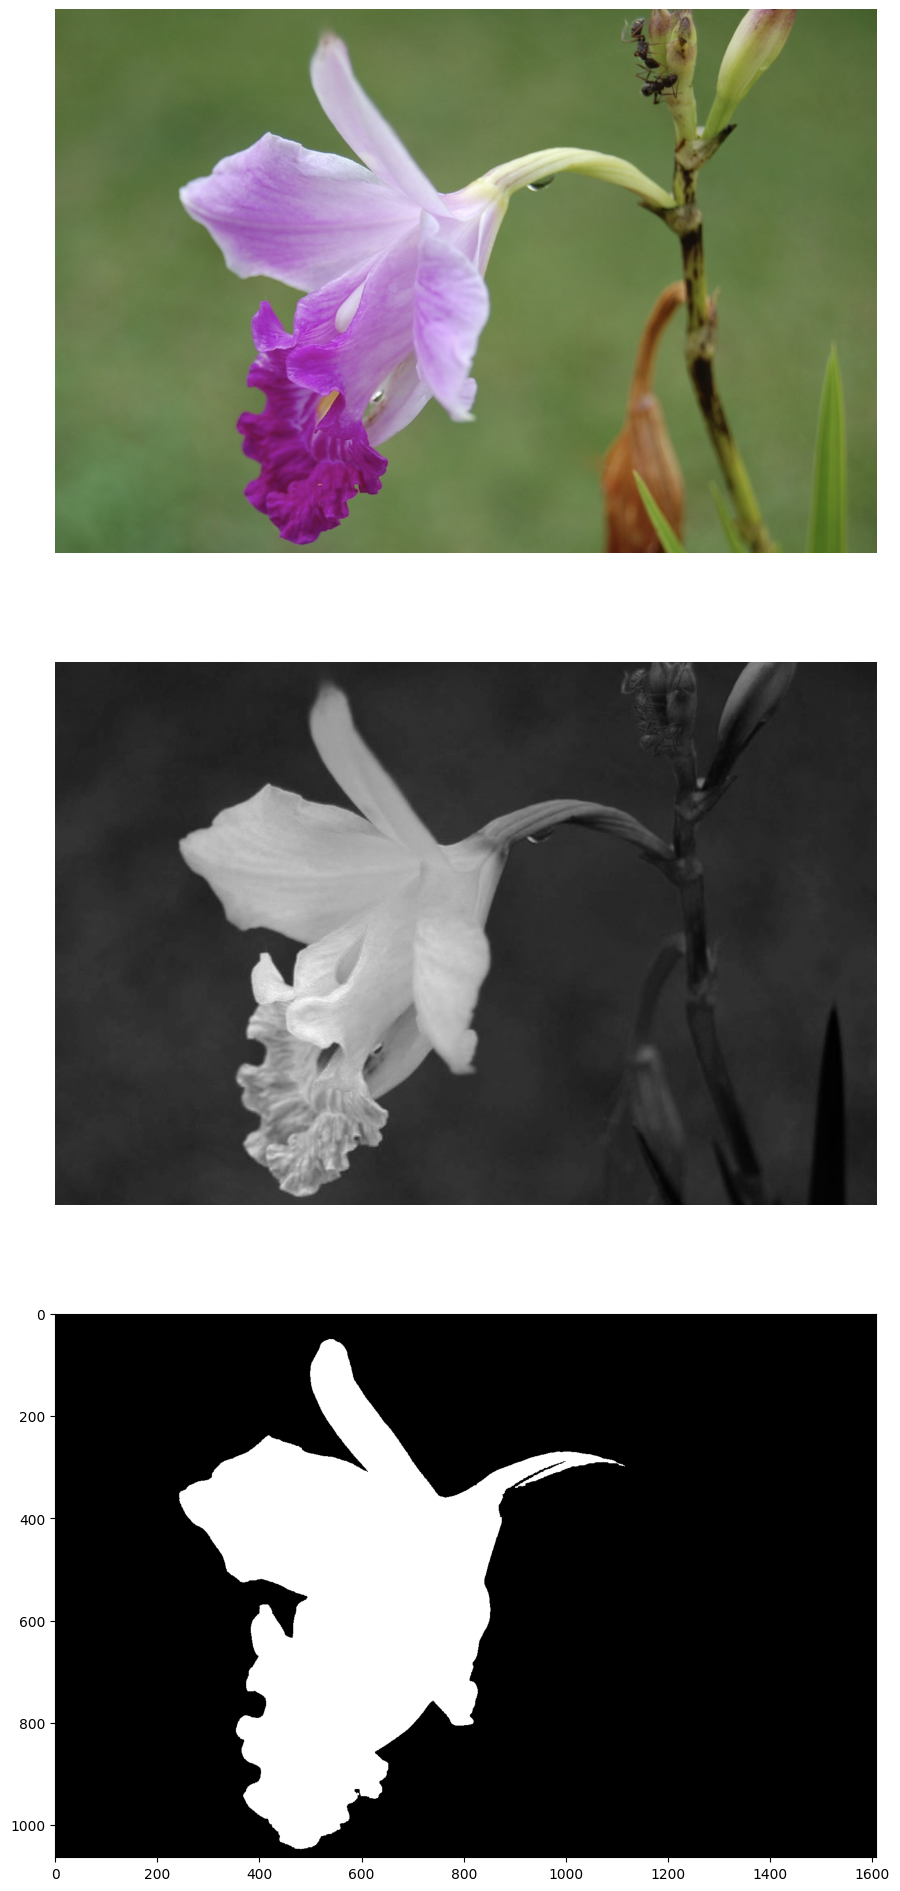

In [ ]:
import matplotlib.pylab as plt

from cv2 import imread, cvtColor, COLOR_BGR2RGB

img = imread('flor.png')

seg0,hci = segbalu(img)

seg1 = np.array(seg0, dtype=bool)
seg = morphology.remove_small_objects(seg1, min_size=5000, connectivity=1)

fig, ax = plt.subplots(3, 1, figsize=(20, 24))
print('Despliegue de imagenes: Original, Gris de alto contrast (HCI) y Segmentacion')
ax[0].imshow(cvtColor(img, COLOR_BGR2RGB))
ax[0].axis('off')
ax[1].imshow(hci,cmap='gray')
ax[1].axis('off')
ax[2].imshow(seg,cmap='gray')
ax[1].axis('off')
plt.show()
